<div style="display: flex; background-color: RGB(255,114,0);" >
<div>
<img src="img/fraudeur_-_BNPP_PF_-_finale.jpg" width="300"/>
</div>

# PROJET - Comment démasquer les fraudeurs ? <mark>EDA toutes les données</mark>
</div>

par BNP Paribas PF

Lien vers le challenge : https://challengedata.ens.fr/participants/challenges/104/

<div style="display: flex; background-color: Blue; padding: 15px;" >

## 1.CHARGEMENT des données
</div>


In [1]:
from os import getcwd
from os.path import join
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

from pr_auc_score_SB05ixL import *
from bnp_paribas import *

In [2]:
# ---------------------------------------------------------------------------------------------
#                               MAIN
# ---------------------------------------------------------------------------------------------
verbose = 1

# Récupère le répertoire du programme
execution_path = getcwd().split("projet_bnp_paribas_fraudeurs")[0]
execution_path = join(execution_path, 'projet_bnp_paribas_fraudeurs')


data_set_path = join(execution_path, 'dataset')
data_set_train_file_name = join(data_set_path, "train_complete_encoded_hyper_light_2023_01_19.csv")

print(f"Current execution path : {execution_path}")
print(f"Dataset path : {data_set_path}")

Current execution path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_bnp_paribas_fraudeurs
Dataset path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_bnp_paribas_fraudeurs\dataset


> Chargement des données pré-traitées

In [3]:
target = "fraud_flag"

In [4]:
# [load_splited_data   ]	INFO  Chargement des données train sources...                          
# [load_splited_data   ]	INFO  (92790, 1981) train données chargées                          
# [load_splited_data   ]	INFO  Séparation de X et y...                          
# [load_splited_data   ]	INFO  split du dataset_path...                          
# [load_splited_data   ]	INFO  5 dataset LOAD                          
# [load_splited_data   ]	INFO  (74232, 1980) / (18558, 1980) 
random_state = 42
dataset_dict = load_splited_data(dataset_path=data_set_train_file_name,over_name="BorderlineSMOTE", random_state = random_state, save_it=True, force=False, verbose=verbose)

X_train, X_test, y_train, y_test, train_origin = dataset_dict.get("X_train", None), dataset_dict.get("X_test", None), dataset_dict.get("y_train", None), dataset_dict.get("y_test", None), dataset_dict.get("train_origin", None)

to_plot_X = [X_train]
to_plot_y = [y_train]
titles = ["Origin"]

[load_splited_data   ]	INFO  Loading X_train...                          
[load_splited_data   ]	INFO  Loading X_test...                          
[load_splited_data   ]	INFO  Loading y_train...                          
[load_splited_data   ]	INFO  Loading y_test...                          
[load_splited_data   ]	INFO  4 dataset LOAD                          
[load_splited_data   ]	INFO  (74232, 1982) / (18558, 1982)                          


> Chargement du set de test officiel

In [5]:
# file_name= "test_complete_encoded_2023_01_19.csv"
data_set_test_file_name = data_set_train_file_name.replace("train_complete_hyper", "test_complete")
test_origin = load_test_df(file_path=data_set_test_file_name, train_columns=X_train.columns, verbose=verbose)
dataset_dict["test_origin"] = test_origin
test_origin

(92790, 1981) test données chargées
(92790, 1982) test données mises à jour


,index,ID,Nb_of_items,item_BED LINEN_nb,item_BED LINEN_cash,item_BATHROOM_nb,item_BATHROOM_cash,item_DISPOSABLE TABLEWARE CUTLERY_nb,item_DISPOSABLE TABLEWARE CUTLERY_cash,item_TOYS_nb,...,make_BLUEBELLA_cash,make_ROLSER_nb,make_ROLSER_cash,make_DARTINGTON CRYSTAL_nb,make_DARTINGTON CRYSTAL_cash,make_TEMPLE ISLAND_nb,make_TEMPLE ISLAND_cash,make_GHD_nb,make_GHD_cash,amount
index,,,,,,,,,,,,,,,,,,,,,
0,0,85517,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,889.0
1,0,51113,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,409.0
2,0,83008,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1399.0
3,0,78712,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,808.0
4,0,77846,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1199.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92785,0,21243,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,306.0
92786,0,45891,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,898.0
92787,0,42613,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1727.0


> Chargement des scores déjà enregistrés

In [11]:
score_path = r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_bnp_paribas_fraudeurs\dataset\score.csv'
scores = load_scores(score_path=score_path, save_it=False, verbose=verbose)
scores.sort_values(["pr_auc_score TEST officiel","pr_auc_score TEST perso"], ascending=False)

,Modèle,Features,Add Data,Accuracy Score,pr_auc_score TEST perso,pr_auc_score TEST officiel,Params,Commentaire
date,,,,,,,,
2023-01-20 16:16,LGBMClassifier,Items,NaN,0.986259,0.093033,0.078557,"boosting_type='goss', max_depth=5,learning_rat...",Sans ajout de données
2023-01-21 17:29,LGBMClassifier,Items,RandomOverSampler,0.925989,0.879887,0.068491,"boosting_type='goss', max_depth=5,learning_rat...",AVEC ajout de données sur tout le dataset
2023-01-21 17:31,LogisticRegression,Items,RandomOverSampler,0.733608,0.657288,0.032113,"penalty=""l2"", fit_intercept=True,solver='libli...",AVEC ajout de données sur tout le dataset
2023-01-20 15:29,LogisticRegression,Items,NaN,0.985074,0.014657,0.016812,"penalty=""l2"", fit_intercept=True,solver='libli...",Sans ajout de données
2023-01-21 17:45,LGBMClassifier,ALL,RandomOverSampler,0.932220,0.888196,0.000000,"boosting_type='goss', max_depth=5,learning_rat...",AVEC ajout de données sur tout le dataset
2023-01-21 17:40,LogisticRegression,ALL,RandomOverSampler,0.726748,0.650713,0.000000,"penalty=""l2"", fit_intercept=True,solver='libli...",AVEC ajout de données sur tout le dataset
2023-01-21 17:35,LGBMClassifier,ALL,NaN,0.986152,0.093013,0.000000,"boosting_type='goss', max_depth=5,learning_rat...",SANS ajout de données
2023-02-14 14:59,LGBMClassifier,ALL,NaN,0.985936,0.078879,0.000000,"boosting_type='goss', max_depth=5,learning_rat...",NaN
2023-02-14 16:56,LGBMClassifier,ALL,NaN,0.985667,0.070795,0.000000,"boosting_type='goss', max_depth=5,learning_rat...",add amount column


<div style="display: flex; background-color: indigo;" >

#### 2.4.4. Représentation des données
</div>

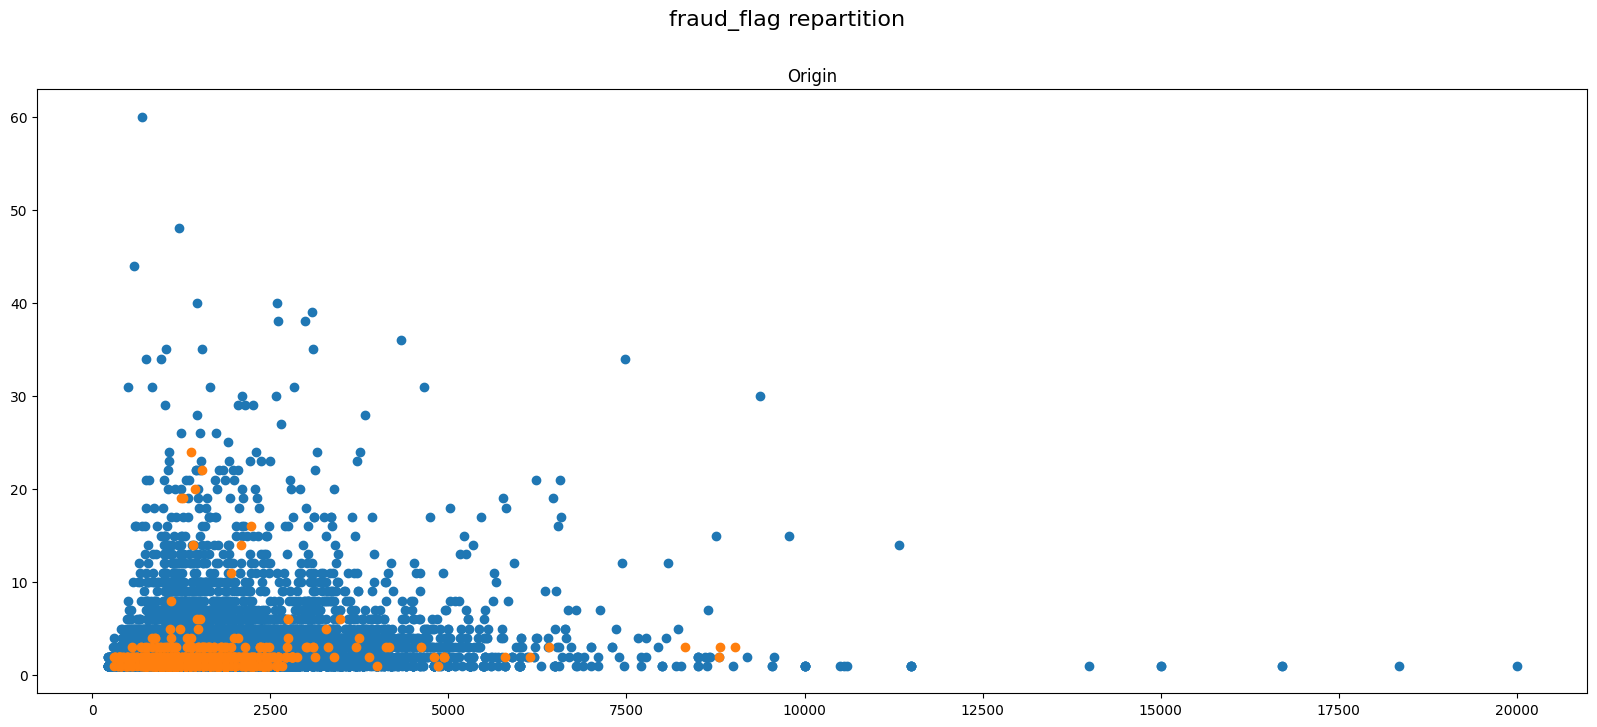

In [11]:
plot_scatters(to_plot_X, to_plot_y,titles=titles, target=target, verbose=verbose)

<div style="display: flex; background-color: Blue; padding: 15px;" >

## 4.Ajout de données
</div>

RandomOverSampler : 
> Object to over-sample the minority class(es) by picking samples at random with replacement. The bootstrap can be generated in a smoothed manner.

https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.RandomOverSampler.html

> Le sur-échantillonnage aléatoire (random oversampling, ROS) des observations minoritaires. On tire au hasard des individus minoritaires que l’on rajoute aux données. Les individus minoritaires se voient ainsi « clonés » de multiples fois, raison pour laquelle cette méthode est aussi appelée Replicative oversampling. Elle est peu efficace pour les arbres car ils continuent à surapprendre ces points sans généraliser, mais elle peut fonctionner pour un modèle linéaire comme une régression logistique.

https://kobia.fr/imbalanced-data-et-machine-learning/

> Le sur-échantillonnage synthétique (SMOTE pour Synthetic Minority Oversampling Technique) est une méthode plus avancée, qui produit des observations minoritaires ressemblantes mais distinctes de celles déjà existantes. Pour plus de précisions, vous pouvez consulter notre article dédié au SMOTE.

<div style="display: flex; background-color: Green; padding: 7px;" >

### 4.1. Ajout de données avec RandomOverSampler
</div>

Analyse :

- La 1ère version de l'ajout des données était basée sur l'ensemble du dataset, ce qui a faussé les résultats, car ça a augmenté les chances que les données du set de tests soient également présentes dans le set de train. les scores avec ces configurations étaient : 
`0.7267484763180191` et `0.6507125123342998`

- La 2nd version est donc appliquée uniquement au set de test

In [6]:
expected_val = max(y_train[target].value_counts())
print(y_train[target].value_counts())
print("--------------------------------")
print(f"Expected : {expected_val} by value, so shape :", expected_val*2)

0    73185
1     1047
Name: fraud_flag, dtype: int64
--------------------------------
Expected : 73185 by value, so shape : 146370


In [7]:
dataset_over = over_dataset_with_RandomOverSampler(X_train,y_train, data_set_path=data_set_train_file_name, 
expected_val=expected_val, random_state=random_state, target = target, verbose=verbose)

X_train_over = dataset_over.drop(target, axis=1)
y_train_over = complete_y_cols(X_train_over, y_param=dataset_over[target])

dataset_dict_over = deepcopy(dataset_dict)
dataset_dict_over['X_train'] = X_train_over
dataset_dict_over['y_train'] = y_train_over

dataset_over

[over_RandomOverSampler]	INFO  c:\Users\User\WORK\workspace-ia\PROJETS\projet_bnp_paribas_fraudeurs\dataset\train_complete_OVER_RandomOverSampler_encoded_hyper_light_2023_01_19.csv LOAD                          


,Unnamed: 0,index,ID,Nb_of_items,item_BED LINEN_nb,item_BED LINEN_cash,item_BATHROOM_nb,item_BATHROOM_cash,item_DISPOSABLE TABLEWARE CUTLERY_nb,item_DISPOSABLE TABLEWARE CUTLERY_cash,...,make_ROLSER_nb,make_ROLSER_cash,make_DARTINGTON CRYSTAL_nb,make_DARTINGTON CRYSTAL_cash,make_TEMPLE ISLAND_nb,make_TEMPLE ISLAND_cash,make_GHD_nb,make_GHD_cash,amount,fraud_flag
0,0,12214,79535,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1197.0,0
1,1,21619,56408,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1635.0,0
2,2,18886,14674,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2639.0,0
3,3,85690,33513,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1873.0,1
4,4,30417,65918,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1249.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146365,146365,43886,104961,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1769.0,1
146366,146366,30455,92460,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1490.0,1
146367,146367,48021,95506,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1855.0,1
146368,146368,5657,107631,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1769.0,1


In [73]:
y_train_over[target].value_counts()

0    73185
1    73185
Name: fraud_flag, dtype: int64

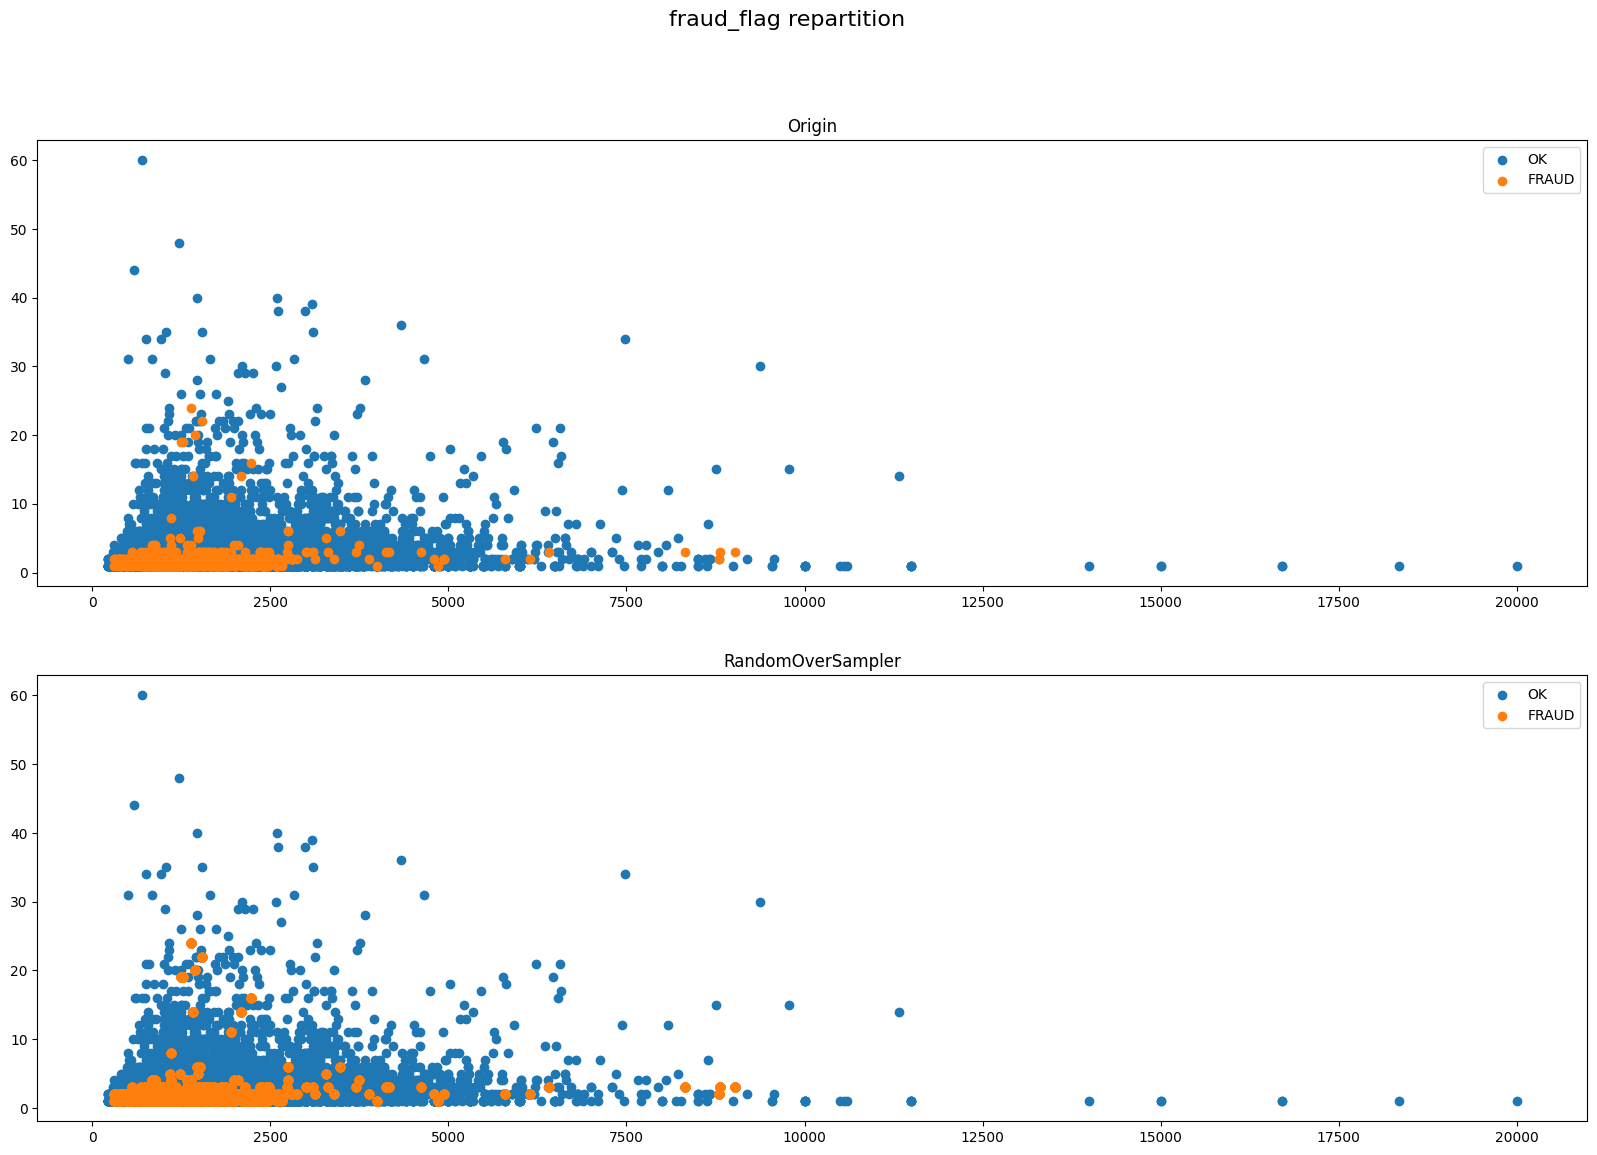

In [9]:
to_plot_X.append(dataset_dict_over["X_train"])
to_plot_y.append(dataset_dict_over["y_train"])
titles.append("RandomOverSampler")

plot_scatters(Xs=to_plot_X, ys=to_plot_y,titles=titles,target=target, size=(20, 15), verbose=verbose)

<div style="display: flex; background-color: indigo;" >

#### M.3.2. LogisticRegression
</div>

In [65]:
# accuracy score : 0.5651471063692208, pr_auc score : 0.026699804461301335
# accuracy score : 0.6062614505873478, pr_auc score : 0.026763454591926503  
# accuracy score : 0.5986097639831879, pr_auc score : 0.026163083776417108
model, n_scores = train_LogisticRegression(dataset_dict=dataset_dict_over, data_set_path=data_set_path, 
                            scores=scores, score_path=score_path, 
                            features="ALL", add_data="RandomOverSampler",commentaire="Add amount and Add data on train", 
                            verbose=verbose)

[train_model         ]	INFO  accuracy score : 0.5986097639831879, pr_auc score : 0.026163083776417108                          
[train_model         ]	INFO  Prediction for test orgine...                          


In [66]:
scores = n_scores
save_score(n_scores, score_path=score_path)

<div style="display: flex; background-color: indigo;" >

#### M.3.3. LGBMClassifier
</div>

In [67]:
# Previously :     0.8935230089449294, pr_auc score : 0.060563220710355574
# accuracy score : 0.9283866795990947, pr_auc score : 0.05911797423462189
# accuracy score : 0.9316736717318677, pr_auc score : 0.06832079693507942
lgb_classifier, n_scores = train_LGBMClassifier(dataset_dict=dataset_dict_over, data_set_path=data_set_path, 
                            scores=scores, score_path=score_path, 
                            features="ALL",  add_data="RandomOverSampler",commentaire="Add amount and Add data on train", 
                            verbose=verbose)

[train_model         ]	INFO  accuracy score : 0.9316736717318677, pr_auc score : 0.06832079693507942                          
[train_model         ]	INFO  Prediction for test orgine...                          


In [68]:
scores = n_scores
save_score(n_scores, score_path=score_path)

<div style="display: flex; background-color: Green; padding: 7px;" >

### 4.2. Ajout de données avec SMOTE :  Synthetic Minority Oversampling Technique
</div>

https://kobia.fr/imbalanced-data-et-machine-learning/

> Le sur-échantillonnage synthétique (SMOTE pour Synthetic Minority Oversampling Technique) est une méthode plus avancée, qui produit des observations minoritaires ressemblantes mais distinctes de celles déjà existantes. Pour plus de précisions, vous pouvez consulter notre article dédié au SMOTE.

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [10]:
dataset_over_SMOTE = over_dataset_with_SMOTE(X_train,y_train, data_set_path=data_set_train_file_name, 
                     sampling_strategy='minority', random_state=random_state, target = target, verbose=verbose)

X_train_over = dataset_over_SMOTE.drop(target, axis=1)
y_train_over = complete_y_cols(X_train_over, y_param=dataset_over_SMOTE[target])

dataset_dict_over_SMOTE = deepcopy(dataset_dict)
dataset_dict_over_SMOTE['X_train'] = X_train_over
dataset_dict_over_SMOTE['y_train'] = y_train_over

[over_SMOTE          ]	INFO  c:\Users\User\WORK\workspace-ia\PROJETS\projet_bnp_paribas_fraudeurs\dataset\train_complete_OVER_SMOTE_minority_encoded_hyper_light_2023_01_19.csv LOAD                          


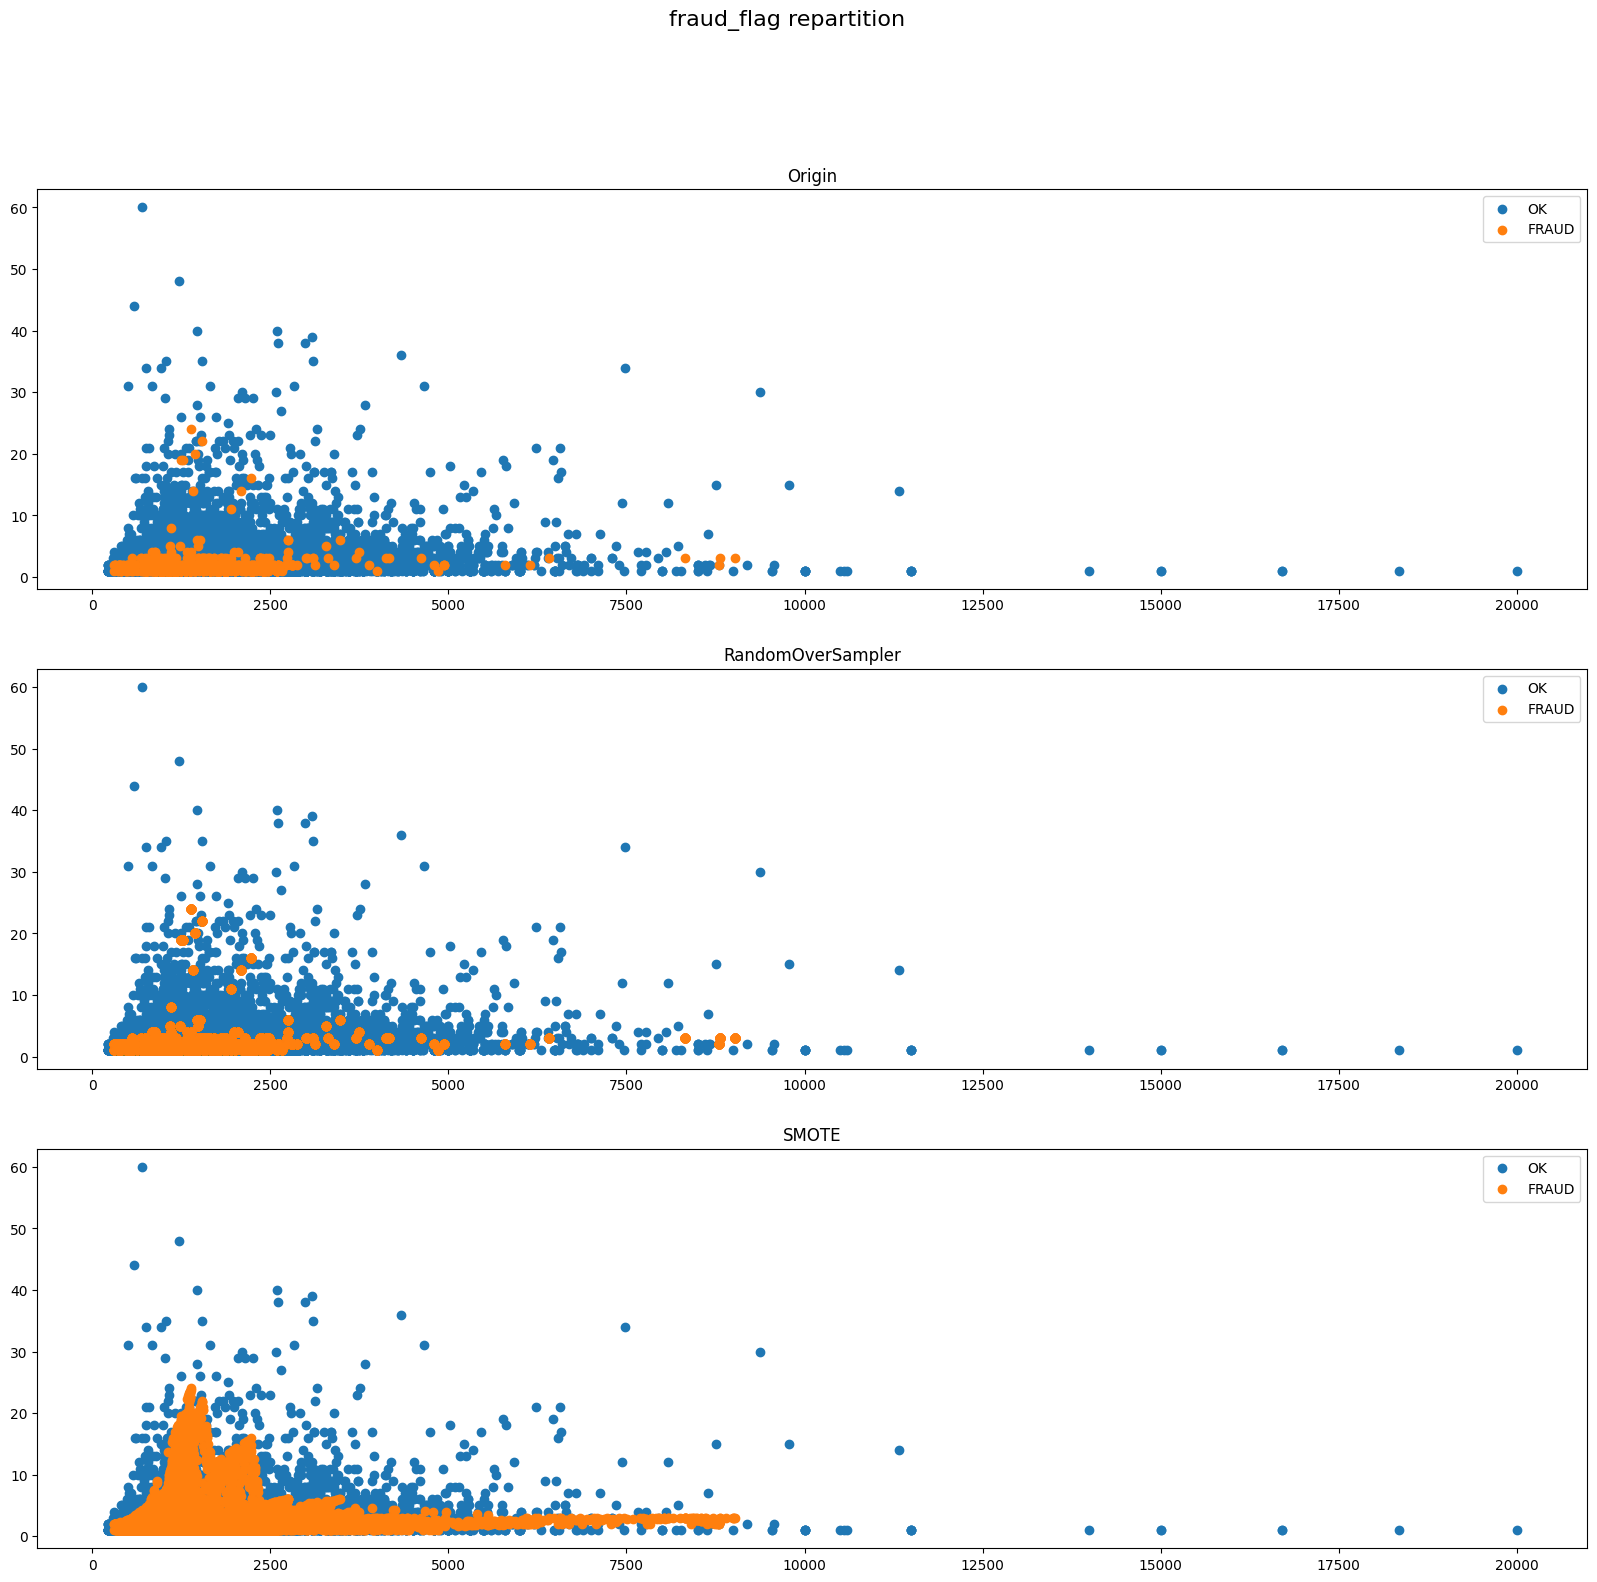

In [11]:
to_plot_X.append(dataset_dict_over_SMOTE["X_train"])
to_plot_y.append(dataset_dict_over_SMOTE["y_train"])
titles.append("SMOTE")

plot_scatters(Xs=to_plot_X, ys=to_plot_y,titles=titles,target=target, size=(20, 15), verbose=verbose)

<div style="display: flex; background-color: indigo;" >

#### M.4.2. LogisticRegression
</div>

In [ ]:
# 0.5454251535725833, 0.025792401467034952
# Fail not enought memory (2.16 GiB)
model, n_scores = train_LogisticRegression(dataset_dict=dataset_dict_over_SMOTE, data_set_path=data_set_path, 
                            scores=scores, score_path=score_path, 
                            features="ALL", add_data="SMOTE",commentaire="Amount and Add data on train", 
                            verbose=verbose)

In [ ]:
scores = n_scores
save_score(n_scores, score_path=score_path)

<div style="display: flex; background-color: indigo;" >

#### M.4.3. LGBMClassifier
</div>

In [ ]:
# 0.9706864963896972 and fail
# Fail not enought memory (2.16 GiB)
lgb_classifier, n_scores = train_LGBMClassifier(dataset_dict=dataset_dict_over_SMOTE, data_set_path=data_set_path, 
                            scores=scores, score_path=score_path, 
                            features="ALL",  add_data="SMOTE",commentaire="Amount and Add data on train", 
                            verbose=verbose)

In [ ]:
scores = n_scores
save_score(n_scores, score_path=score_path)

<div style="display: flex; background-color: Green; padding: 7px;" >

### 4.2. Ajout de données avec Borderline-SMOTE2
</div>

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/



In [5]:
dataset_over_BorderlineSMOTE = over_dataset_with_BorderlineSMOTE(X_train,y_train, data_set_path=data_set_train_file_name, 
                    target = target, verbose=verbose)

X_train_over = dataset_over_BorderlineSMOTE.drop(target, axis=1)
y_train_over = complete_y_cols(X_train_over, y_param=dataset_over_BorderlineSMOTE[target])

dataset_dict_over_BorderlineSMOTE = {
    'X_train' : X_train_over,
    'y_train' : y_train_over,
}

[over_BorderlineSMOTE]	INFO  c:\Users\User\WORK\workspace-ia\PROJETS\projet_bnp_paribas_fraudeurs\dataset\train_complete_OVER_BorderlineSMOTE_encoded_hyper_light_2023_01_19.csv LOAD                          


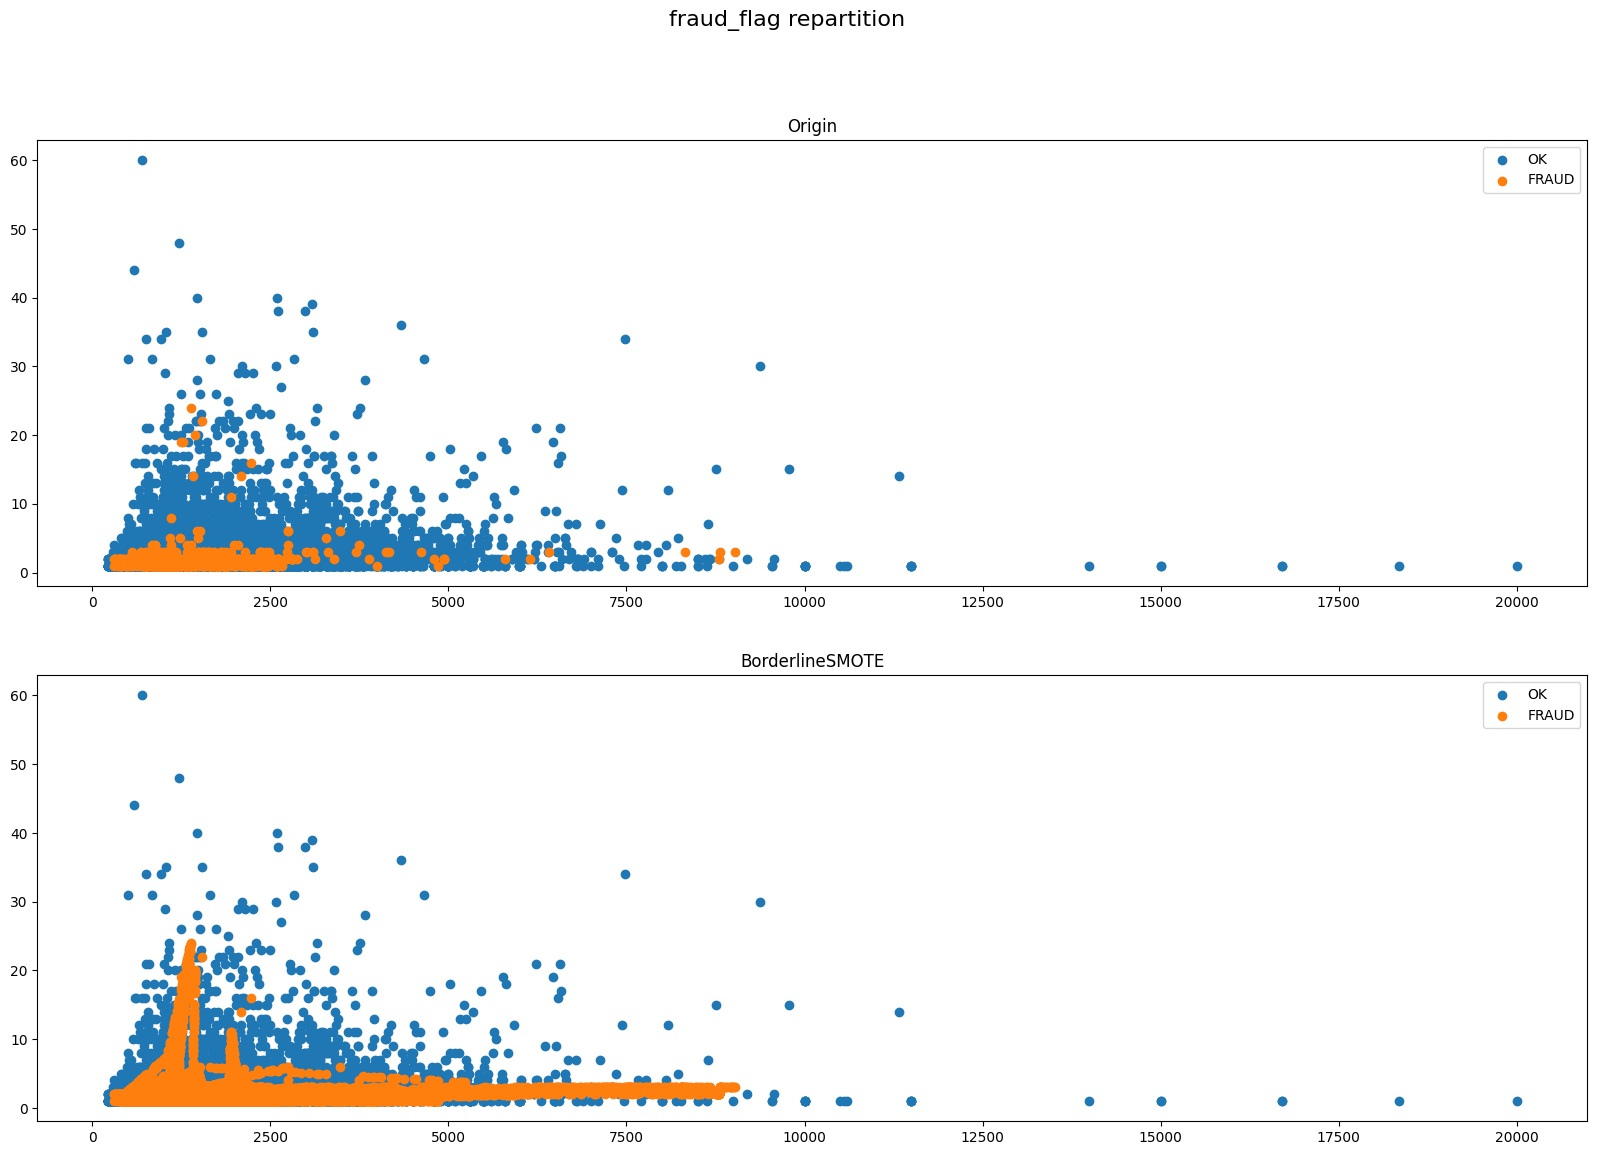

In [6]:
to_plot_X.append(dataset_dict_over_BorderlineSMOTE["X_train"])
to_plot_y.append(dataset_dict_over_BorderlineSMOTE["y_train"])
titles.append("BorderlineSMOTE")

plot_scatters(Xs=to_plot_X, ys=to_plot_y,titles=titles,target=target, size=(20, 20), verbose=verbose)

<div style="display: flex; background-color: indigo;" >

#### M.4.2. LogisticRegression
</div>

In [14]:
# accuracy score : 0.6343355965082444, pr_auc score : 0.02839034596400146
model, n_scores = train_LogisticRegression(dataset_dict=dataset_dict_over_BorderlineSMOTE, data_set_path=data_set_path, 
                            scores=scores, score_path=score_path, 
                            features="ALL", add_data="BorderlineSMOTE",commentaire="Amount and Add data on train", 
                            verbose=verbose)

[train_model         ]	INFO  accuracy score : 0.6343355965082444, pr_auc score : 0.02839034596400146                          
[train_model         ]	INFO  Prediction for test orgine...                          


In [15]:
scores = n_scores
save_score(n_scores, score_path=score_path)

<div style="display: flex; background-color: indigo;" >

#### M.4.3. LGBMClassifier
</div>

In [16]:
# accuracy score : 0.9804397025541546, pr_auc score : 0.0656192581808136
lgb_classifier, n_scores = train_LGBMClassifier(dataset_dict=dataset_dict_over_BorderlineSMOTE, data_set_path=data_set_path, 
                            scores=scores, score_path=score_path, 
                            features="ALL",  add_data="BorderlineSMOTE",commentaire="Amount and Add data on train", 
                            verbose=verbose)

[train_model         ]	INFO  accuracy score : 0.9804397025541546, pr_auc score : 0.0656192581808136                          
[train_model         ]	INFO  Prediction for test orgine...                          


In [ ]:
scores = n_scores
save_score(n_scores, score_path=score_path)

<div style="display: flex; background-color: Green; padding: 7px;" >

### 4.2. Ajout de données avec SVMSMOTE
</div>

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/



In [8]:
dataset_over_SVMSMOTE = over_dataset_with_SVMSMOTE(X_train,y_train, data_set_path=data_set_train_file_name, 
                    target = target, verbose=verbose)

X_train_over = dataset_over_BorderlineSMOTE.drop(target, axis=1)
y_train_over = complete_y_cols(X_train_over, y_param=dataset_over_BorderlineSMOTE[target])

dataset_dict_over_SVMSMOTE ={
    'X_train' : X_train_over,
    'y_train' : y_train_over,
}

[over_SVMSMOTE       ]	INFO  (114387, 1982), (114387,)                          
[over_SVMSMOTE       ]	INFO  c:\Users\User\WORK\workspace-ia\PROJETS\projet_bnp_paribas_fraudeurs\dataset\train_complete_OVER_SVMSMOTE_encoded_hyper_light_2023_01_19.csv SAVE                          


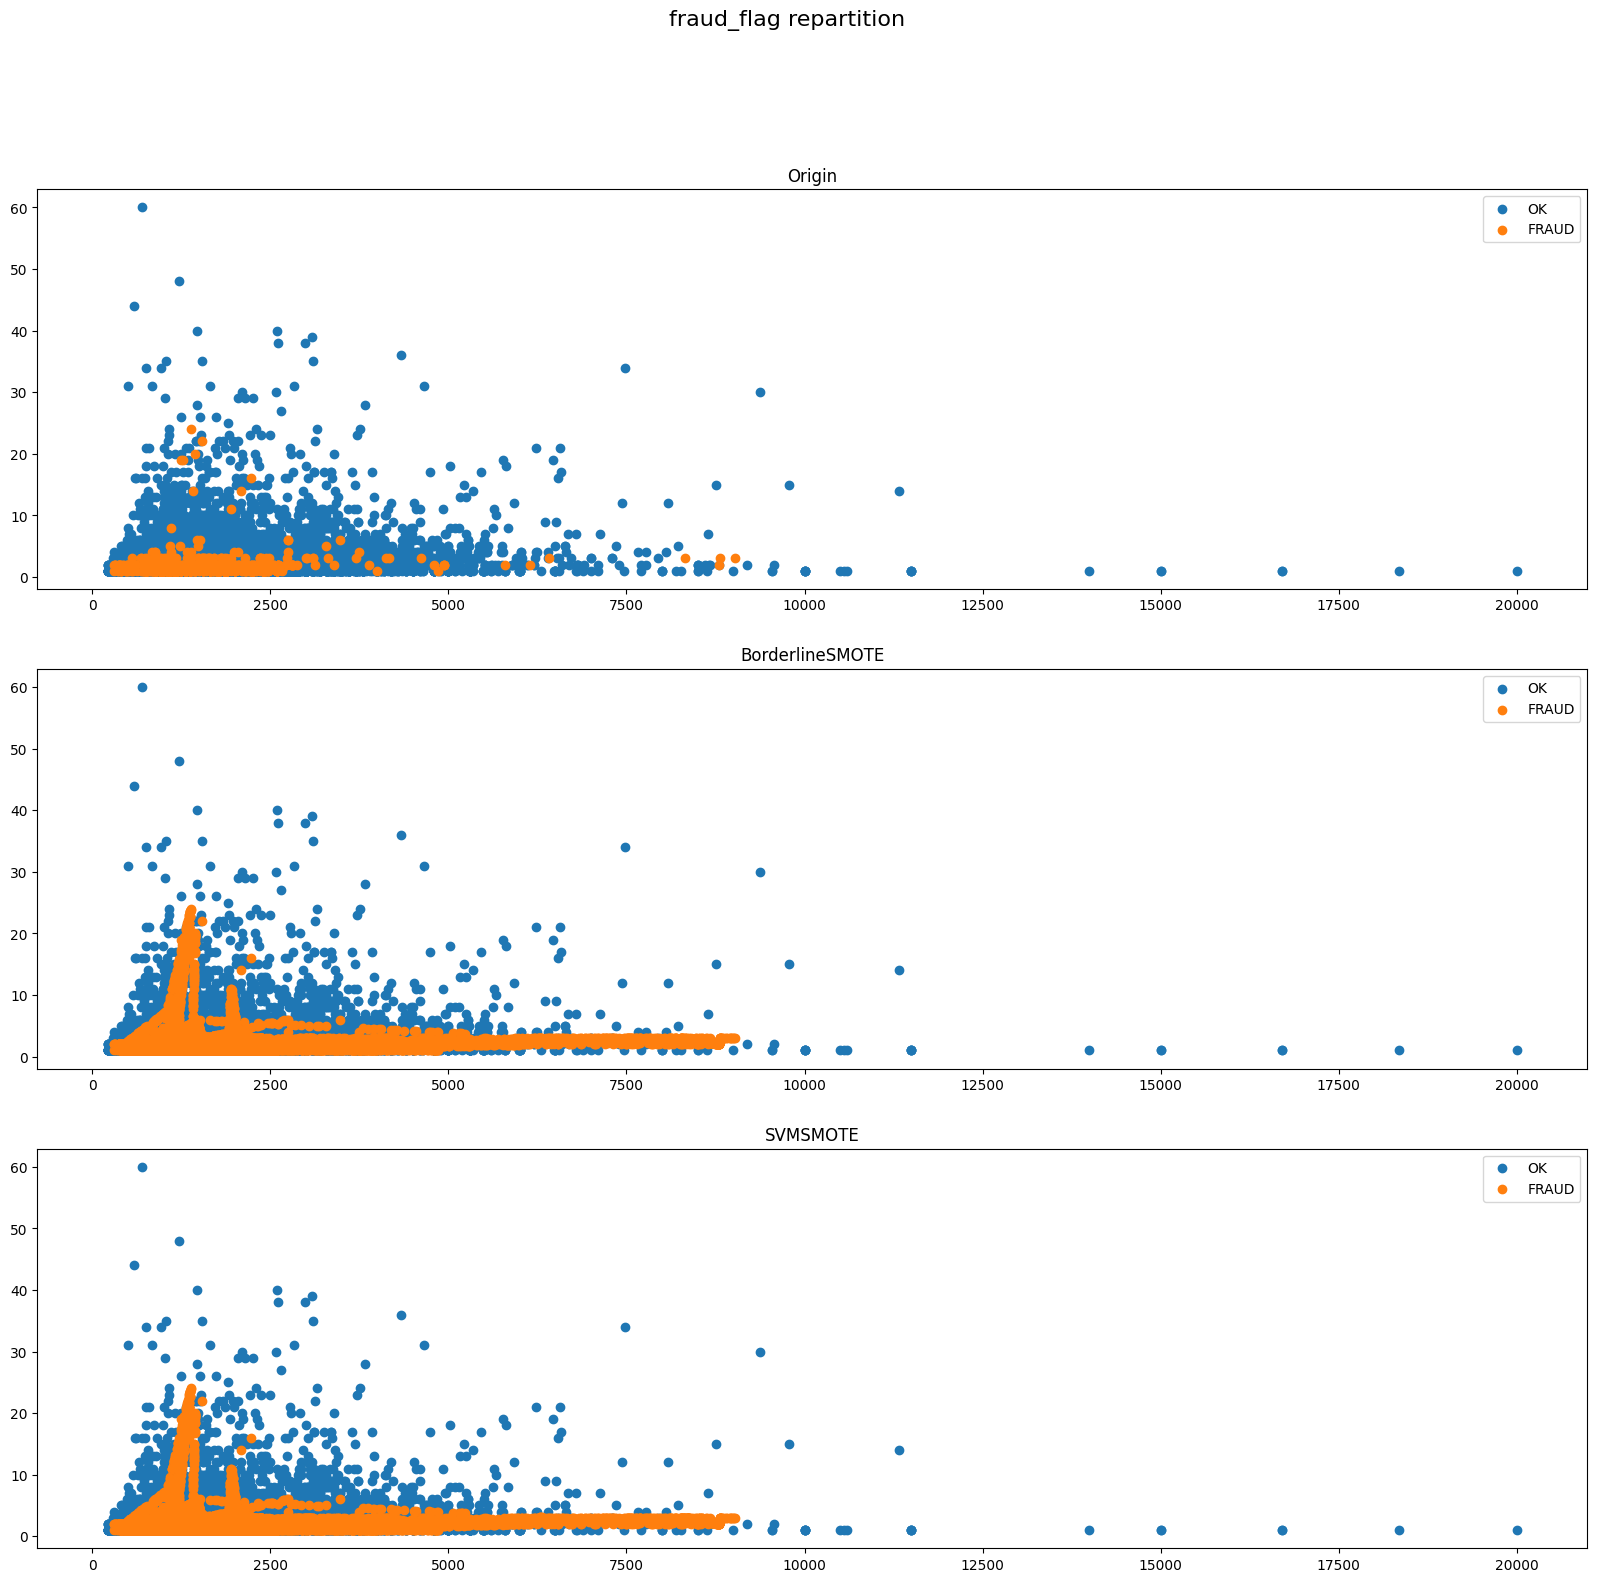

In [9]:
to_plot_X.append(dataset_dict_over_SVMSMOTE["X_train"])
to_plot_y.append(dataset_dict_over_SVMSMOTE["y_train"])
titles.append("SVMSMOTE")

plot_scatters(Xs=to_plot_X, ys=to_plot_y,titles=titles,target=target, size=(20, 20), verbose=verbose)